In [646]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [647]:
# Load your customers data 
Customers = pd.read_csv('credit2.csv')
Customers

,customerid,credit,current_account,duration,previous_credit,purpose,amount,value_saving_stocks,tenure,install_rate,...,living_at_current_address,valueable_assets,age,other_credits,apartment_type,credits_at_bank,occupation,num_dependents,broadband,foreign_worker
0,1001,good,no_balance_or_debit,from_06_to_12,no_previous_credit_or_paid_back_all_previous_c...,used_car,from_0.5K_to_1K,from_500_to_1000_DM,less_than_1_year,more_than_35_percent,...,more_than_7_years,not_available_or_no_assets,less_than_25,no_further_running_credits,free_apartment,one,unskilled_with_permanent_residence,three_or_more,no,yes
1,1002,bad,more_than_200_DM,from_06_to_12,no_previous_credit_or_paid_back_all_previous_c...,used_car,from_1.5K_to_2.5K,not_available_or_no_savings,less_than_1_year,from_20_to_35_percent,...,from_1_to_4_years,saving_contract_or_life_insurance,less_than_25,no_further_running_credits,free_apartment,two_or_three,skilled_worker,three_or_more,no,yes
2,1003,good,no_balance_or_debit,from_06_to_12,no_problems_current_credit_at_bank,furniture,from_0.5K_to_1K,not_available_or_no_savings,from_1_to_4_years,less_than_20_percent,...,more_than_7_years,not_available_or_no_assets,less_than_25,no_further_running_credits,free_apartment,two_or_three,skilled_worker,three_or_more,no,yes
3,1004,bad,no_running_account,from_06_to_12,no_previous_credit_or_paid_back_all_previous_c...,furniture,from_0.5K_to_1K,less_than_100_DM,from_4_to_7_years,less_than_20_percent,...,less_than_1_year,car_or_other,less_than_25,no_further_running_credits,rented_flat,one,skilled_worker,three_or_more,no,yes
4,1005,good,no_running_account,from_06_to_12,no_previous_credit_or_paid_back_all_previous_c...,furniture,from_1K_to_1.5K,not_available_or_no_savings,from_1_to_4_years,from_20_to_35_percent,...,from_1_to_4_years,not_available_or_no_assets,less_than_25,no_further_running_credits,free_apartment,one,executive,up_to_two,yes,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,1996,good,more_than_200_DM,<06,no_previous_credit_or_paid_back_all_previous_c...,retraining,from_2.5K_to_5K,not_available_or_no_savings,from_4_to_7_years,more_than_35_percent,...,more_than_7_years,not_available_or_no_assets,more_than_65,no_further_running_credits,rented_flat,one,unskilled_with_permanent_residence,three_or_more,no,yes
996,1997,good,more_than_200_DM,from_18_to_24,paid_back_previous_credits_at_this_bank,retraining,from_2.5K_to_5K,not_available_or_no_savings,from_1_to_4_years,from_20_to_25_percent,...,from_1_to_4_years,not_available_or_no_assets,more_than_65,no_further_running_credits,rented_flat,one,executive,three_or_more,yes,yes
997,1998,bad,no_balance_or_debit,from_06_to_12,problematic_running_account,new_car,from_5K_to_7.5K,not_available_or_no_savings,more_than_7_years,from_20_to_35_percent,...,more_than_7_years,house_or_land,more_than_65,at_other_banks,owner_occupied_flat,one,executive,up_to_two,yes,yes
998,1999,good,no_running_account,<06,no_previous_credit_or_paid_back_all_previous_c...,other,from_1K_to_1.5K,more_than_1000_DM,unemployed,less_than_20_percent,...,from_4_to_7_years,car_or_other,more_than_65,no_further_running_credits,rented_flat,one,executive,three_or_more,yes,yes


In [648]:
Customers.dtypes

customerid                    int64
credit                       object
current_account              object
duration                     object
previous_credit              object
purpose                      object
amount                       object
value_saving_stocks          object
tenure                       object
install_rate                 object
marital_status_sex           object
debtor_guarantors            object
living_at_current_address    object
valueable_assets             object
age                          object
other_credits                object
apartment_type               object
credits_at_bank              object
occupation                   object
num_dependents               object
broadband                    object
foreign_worker               object
dtype: object

In [649]:
Customers.set_index('customerid', inplace=True)
categorical_columns = [
    "credit", "current_account", "duration", "previous_credit",
    "purpose", "amount", "value_saving_stocks", "tenure",
    "install_rate", "marital_status_sex", "debtor_guarantors",
    "living_at_current_address", "valueable_assets", "age",
    "other_credits", "apartment_type", "credits_at_bank",
    "occupation", "num_dependents", "broadband", "foreign_worker"
]

for col in categorical_columns:
    Customers[col] = Customers[col].astype("category").cat.codes

In [650]:
Customers

,credit,current_account,duration,previous_credit,purpose,amount,value_saving_stocks,tenure,install_rate,marital_status_sex,...,living_at_current_address,valueable_assets,age,other_credits,apartment_type,credits_at_bank,occupation,num_dependents,broadband,foreign_worker
customerid,,,,,,,,,,,,,,,,,,,,,
1001,1,2,2,1,8,0,1,2,3,0,...,3,2,3,2,0,1,3,0,0,1
1002,0,1,2,1,8,1,4,2,1,0,...,0,3,3,2,0,3,1,0,0,1
1003,1,2,2,2,1,0,4,0,2,1,...,3,2,3,2,0,3,1,0,0,1
1004,0,3,2,1,1,0,2,1,2,1,...,2,0,3,2,2,1,1,0,0,1
1005,1,3,2,1,1,4,4,0,1,3,...,0,2,3,2,0,1,0,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1996,1,1,0,1,7,5,4,1,3,3,...,3,2,4,2,2,1,3,0,0,1
1997,1,1,4,3,7,5,4,0,0,3,...,0,2,4,2,2,1,0,0,1,1
1998,0,2,2,4,3,6,4,3,1,0,...,3,1,4,1,1,1,0,1,1,1


In [651]:
X = Customers.drop(columns=['credit'])
y = Customers['credit']

In [652]:
# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state= 30)


In [653]:
# creating a RF classifier
model = RandomForestClassifier(n_estimators = 100 ,random_state= 30)  
 
# Training the model on the training dataset
model.fit(X_train, y_train)
 
# performing predictions on the test dataset
y_pred = model.predict(X_test)
 
X_test['Predictions'] = y_pred
X_test['Actual'] = y_test
X_test

,current_account,duration,previous_credit,purpose,amount,value_saving_stocks,tenure,install_rate,marital_status_sex,debtor_guarantors,...,age,other_credits,apartment_type,credits_at_bank,occupation,num_dependents,broadband,foreign_worker,Predictions,Actual
customerid,,,,,,,,,,,,,,,,,,,,,
1924,0,2,1,8,4,3,3,0,0,2,...,1,2,2,1,0,0,1,1,1,1
1922,3,3,3,2,4,4,4,1,0,2,...,1,2,1,0,2,1,0,1,1,0
1517,2,2,3,6,1,4,3,1,0,2,...,0,2,2,3,0,0,1,1,1,0
1088,3,5,1,8,1,4,1,2,0,2,...,3,2,0,1,1,0,0,1,0,0
1880,2,3,3,1,1,3,3,2,3,1,...,1,2,2,3,1,0,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1858,1,2,3,4,1,4,0,2,3,2,...,1,2,2,0,1,0,1,1,1,1
1783,1,4,1,4,6,4,0,3,3,2,...,1,2,2,1,3,1,0,1,1,1
1599,1,2,1,7,1,4,1,1,3,2,...,0,2,2,1,1,0,1,1,1,1


In [654]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Test accuracy: {accuracy:.2f}")

Test accuracy: 0.77


In [655]:
from sklearn.metrics import confusion_matrix

# y_test contains actual labels and y_pred contains predicted labels
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

Confusion Matrix:
[[ 35  52]
 [ 17 196]]


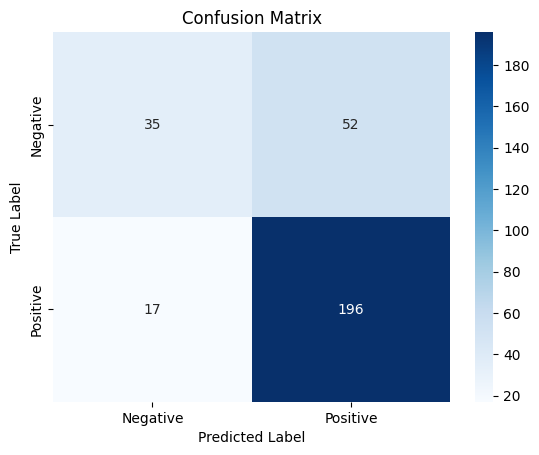

In [662]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plotting the confusion matrix with labels
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [657]:

feature_imp = pd.Series(model.feature_importances_, 
                        index = X_train.columns.values[:20]).sort_values(ascending=False)
feature_imp

current_account              0.110456
duration                     0.106145
purpose                      0.086355
amount                       0.078232
previous_credit              0.063825
tenure                       0.058494
valueable_assets             0.054442
value_saving_stocks          0.051017
install_rate                 0.049699
living_at_current_address    0.049051
age                          0.048098
occupation                   0.041385
marital_status_sex           0.036918
other_credits                0.033230
apartment_type               0.032611
credits_at_bank              0.029902
broadband                    0.024604
debtor_guarantors            0.023232
num_dependents               0.017215
foreign_worker               0.005089
dtype: float64